[View in Colaboratory](https://colab.research.google.com/github/madeleinelee/learning/blob/madeleinelee-patch-1/Copy_of_ex09_BatchNorm.ipynb)

## 確認套件已經安裝 & Get data

In [0]:
from __future__ import print_function
!pip install -q keras
import keras
from google.colab import files
import numpy as np
from past.builtins import execfile
import numpy as np
import os

from keras.utils import np_utils
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

Using TensorFlow backend.


## 請將本機端的資料 "pkgo_city66_cass5_v1.csv" 上傳到 colab 環境

In [0]:
if not os.path.exists("pkgo_city66_class5_v1.csv"):
  uploaded = files.upload()

def readInput(file):
  ''' Read input files '''
  my_data = np.genfromtxt(file, delimiter=',',skip_header=1)

  ''' The first column to the 199th column is used as input features '''
  X_train = my_data[:,0:200]
  X_train = X_train.astype('float32')

  ''' The 200-th column is the answer '''
  y_train = my_data[:,200]
  y_train = y_train.astype('int')

  ''' Convert to one-hot encoding '''
  Y_train = np_utils.to_categorical(y_train,5)

  ''' Shuffle training data '''
  X_train,Y_train = shuffle(X_train,Y_train,random_state=100)
  return X_train, Y_train

X_train, Y_train = readInput(file="pkgo_city66_class5_v1.csv")

## 開始建立第一個模型 
### (資料已經先替各位做過簡單的預處理囉)

In [0]:
''' Import keras to build a DL model '''
from keras.models import Model
from keras.layers import Dense, Activation, Input
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
from keras.regularizers import l1, l2, l1_l2
import keras.backend as K

Building a model with batch_size: 1
Train on 1652 samples, validate on 184 samples
Epoch 1/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.4730 - acc: 0.5133 - val_loss: 13.7529 - val_acc: 0.1467
Epoch 2/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3692 - acc: 0.5163 - val_loss: 13.9282 - val_acc: 0.1359
Epoch 3/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3549 - acc: 0.5163 - val_loss: 13.6832 - val_acc: 0.1467
Epoch 4/50
 517/1652 [========>.....................] - ETA: 3s - loss: 1.3712 - acc: 0.5029

1652/1652 [==============================] - 5s 3ms/step - loss: 1.3529 - acc: 0.5163 - val_loss: 13.8124 - val_acc: 0.1413
Epoch 5/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3527 - acc: 0.5163 - val_loss: 13.4927 - val_acc: 0.1630
Epoch 6/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3526 - acc: 0.5163 - val_loss: 13.5777 - val_acc: 0.1576
Epoch 7/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3526 - acc: 0.5163 - val_loss: 13.7529 - val_acc: 0.1467
Epoch 8/50
  37/1652 [..............................] - ETA: 4s - loss: 1.5638 - acc: 0.3784

1652/1652 [==============================] - 5s 3ms/step - loss: 1.3525 - acc: 0.5163 - val_loss: 13.5797 - val_acc: 0.1576
Epoch 9/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3525 - acc: 0.5163 - val_loss: 13.9571 - val_acc: 0.1304
Epoch 10/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3526 - acc: 0.5163 - val_loss: 13.7529 - val_acc: 0.1467
Epoch 11/50
1642/1652 [============================>.] - ETA: 0s - loss: 1.3520 - acc: 0.5164

1652/1652 [==============================] - 5s 3ms/step - loss: 1.3526 - acc: 0.5163 - val_loss: 13.5932 - val_acc: 0.1522
Epoch 12/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3524 - acc: 0.5163 - val_loss: 13.7551 - val_acc: 0.1467
Epoch 13/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3525 - acc: 0.5163 - val_loss: 13.5209 - val_acc: 0.1576
Epoch 14/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3524 - acc: 0.5163 - val_loss: 13.5777 - val_acc: 0.1576
Epoch 15/50
 135/1652 [=>............................] - ETA: 4s - loss: 1.4448 - acc: 0.4667

1652/1652 [==============================] - 5s 3ms/step - loss: 1.3525 - acc: 0.5163 - val_loss: 13.8405 - val_acc: 0.1413
Epoch 16/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3526 - acc: 0.5163 - val_loss: 13.5289 - val_acc: 0.1576
Epoch 17/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3526 - acc: 0.5163 - val_loss: 13.4901 - val_acc: 0.1630
Epoch 18/50
1609/1652 [============================>.] - ETA: 0s - loss: 1.3506 - acc: 0.5183

1652/1652 [==============================] - 5s 3ms/step - loss: 1.3525 - acc: 0.5163 - val_loss: 13.4901 - val_acc: 0.1630
Epoch 19/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3525 - acc: 0.5163 - val_loss: 13.8406 - val_acc: 0.1413
Epoch 20/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3525 - acc: 0.5163 - val_loss: 13.6200 - val_acc: 0.1522
Epoch 21/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3527 - acc: 0.5163 - val_loss: 13.4446 - val_acc: 0.1630
Epoch 22/50
 140/1652 [=>............................] - ETA: 3s - loss: 1.3842 - acc: 0.5000

1652/1652 [==============================] - 5s 3ms/step - loss: 1.3526 - acc: 0.5163 - val_loss: 13.4025 - val_acc: 0.1685
Epoch 23/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3525 - acc: 0.5163 - val_loss: 13.5672 - val_acc: 0.1522
Epoch 24/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3525 - acc: 0.5163 - val_loss: 13.7012 - val_acc: 0.1467
Epoch 25/50
1625/1652 [============================>.] - ETA: 0s - loss: 1.3490 - acc: 0.5188

1652/1652 [==============================] - 5s 3ms/step - loss: 1.3525 - acc: 0.5163 - val_loss: 13.7529 - val_acc: 0.1467
Epoch 26/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3526 - acc: 0.5163 - val_loss: 13.7529 - val_acc: 0.1467
Epoch 27/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3525 - acc: 0.5163 - val_loss: 13.5778 - val_acc: 0.1576
Epoch 28/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3525 - acc: 0.5163 - val_loss: 13.6653 - val_acc: 0.1522
Epoch 29/50
 174/1652 [==>...........................] - ETA: 3s - loss: 1.3909 - acc: 0.4943

1652/1652 [==============================] - 5s 3ms/step - loss: 1.3526 - acc: 0.5163 - val_loss: 13.6298 - val_acc: 0.1522
Epoch 30/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3526 - acc: 0.5163 - val_loss: 13.8237 - val_acc: 0.1413
Epoch 31/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3526 - acc: 0.5163 - val_loss: 13.6653 - val_acc: 0.1522
Epoch 32/50
1616/1652 [============================>.] - ETA: 0s - loss: 1.3486 - acc: 0.5192

1652/1652 [==============================] - 5s 3ms/step - loss: 1.3526 - acc: 0.5163 - val_loss: 13.4920 - val_acc: 0.1630
Epoch 33/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3525 - acc: 0.5163 - val_loss: 13.7529 - val_acc: 0.1467
Epoch 34/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3525 - acc: 0.5163 - val_loss: 13.4901 - val_acc: 0.1630
Epoch 35/50
1652/1652 [==============================] - 4s 3ms/step - loss: 1.3526 - acc: 0.5163 - val_loss: 13.7529 - val_acc: 0.1467
Epoch 36/50
 198/1652 [==>...........................] - ETA: 3s - loss: 1.3302 - acc: 0.5404

1652/1652 [==============================] - 4s 3ms/step - loss: 1.3525 - acc: 0.5163 - val_loss: 13.5777 - val_acc: 0.1576
Epoch 37/50
1652/1652 [==============================] - 4s 3ms/step - loss: 1.3525 - acc: 0.5163 - val_loss: 13.8405 - val_acc: 0.1413
Epoch 38/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3525 - acc: 0.5163 - val_loss: 13.5978 - val_acc: 0.1522
Epoch 39/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3527 - acc: 0.5163 - val_loss: 13.5779 - val_acc: 0.1576


Epoch 40/50
1652/1652 [==============================] - 4s 3ms/step - loss: 1.3527 - acc: 0.5163 - val_loss: 13.5777 - val_acc: 0.1576
Epoch 41/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3525 - acc: 0.5163 - val_loss: 13.9281 - val_acc: 0.1359
Epoch 42/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3526 - acc: 0.5163 - val_loss: 13.6653 - val_acc: 0.1522
Epoch 43/50
1495/1652 [==========================>...] - ETA: 0s - loss: 1.3604 - acc: 0.5110

1652/1652 [==============================] - 5s 3ms/step - loss: 1.3525 - acc: 0.5163 - val_loss: 13.6653 - val_acc: 0.1522
Epoch 44/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3526 - acc: 0.5163 - val_loss: 13.9586 - val_acc: 0.1304
Epoch 45/50
1652/1652 [==============================] - 4s 3ms/step - loss: 1.3525 - acc: 0.5163 - val_loss: 13.8613 - val_acc: 0.1359
Epoch 46/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3525 - acc: 0.5163 - val_loss: 13.7529 - val_acc: 0.1467
Epoch 47/50
 194/1652 [==>...........................] - ETA: 3s - loss: 1.3957 - acc: 0.5000

1652/1652 [==============================] - 5s 3ms/step - loss: 1.3525 - acc: 0.5163 - val_loss: 14.0157 - val_acc: 0.1304
Epoch 48/50
1652/1652 [==============================] - 4s 3ms/step - loss: 1.3526 - acc: 0.5163 - val_loss: 13.7174 - val_acc: 0.1467
Epoch 49/50
1652/1652 [==============================] - 4s 3ms/step - loss: 1.3525 - acc: 0.5163 - val_loss: 13.8013 - val_acc: 0.1413
Epoch 50/50
1652/1652 [==============================] - 5s 3ms/step - loss: 1.3527 - acc: 0.5163 - val_loss: 13.6228 - val_acc: 0.1522
Building a model with batch_size: 2


Train on 1652 samples, validate on 184 samples
Epoch 1/50
1652/1652 [==============================] - 3s 2ms/step - loss: 1.4458 - acc: 0.4758 - val_loss: 1.3005 - val_acc: 0.5326
Epoch 2/50
1652/1652 [==============================] - 3s 2ms/step - loss: 1.3760 - acc: 0.5036 - val_loss: 1.2508 - val_acc: 0.5380
Epoch 3/50
1652/1652 [==============================] - 2s 1ms/step - loss: 1.3736 - acc: 0.4976 - val_loss: 1.1936 - val_acc: 0.6196
Epoch 4/50
1652/1652 [==============================] - 2s 2ms/step - loss: 1.3680 - acc: 0.4970 - val_loss: 1.2576 - val_acc: 0.5326
Epoch 5/50
1652/1652 [==============================] - 3s 2ms/step - loss: 1.3816 - acc: 0.5151 - val_loss: 1.2144 - val_acc: 0.6196


Epoch 6/50
1652/1652 [==============================] - 2s 2ms/step - loss: 1.3617 - acc: 0.5157 - val_loss: 1.2102 - val_acc: 0.5707
Epoch 7/50
1652/1652 [==============================] - 2s 1ms/step - loss: 1.3543 - acc: 0.5169 - val_loss: 1.1900 - val_acc: 0.5761
Epoch 8/50
1652/1652 [==============================] - 3s 2ms/step - loss: 1.3311 - acc: 0.5285 - val_loss: 1.2194 - val_acc: 0.5326
Epoch 9/50
1652/1652 [==============================] - 3s 2ms/step - loss: 1.3329 - acc: 0.5212 - val_loss: 1.2282 - val_acc: 0.5598
Epoch 10/50
1652/1652 [==============================] - 3s 2ms/step - loss: 1.3279 - acc: 0.5248 - val_loss: 1.1807 - val_acc: 0.6033
Epoch 11/50
 374/1652 [=====>........................] - ETA: 1s - loss: 1.2956 - acc: 0.5508

1652/1652 [==============================] - 3s 2ms/step - loss: 1.3300 - acc: 0.5321 - val_loss: 1.1500 - val_acc: 0.6250
Epoch 12/50
1652/1652 [==============================] - 3s 2ms/step - loss: 1.3443 - acc: 0.5218 - val_loss: 1.2076 - val_acc: 0.5924
Epoch 13/50
1652/1652 [==============================] - 3s 2ms/step - loss: 1.3366 - acc: 0.5176 - val_loss: 1.1565 - val_acc: 0.6033
Epoch 14/50
1652/1652 [==============================] - 2s 2ms/step - loss: 1.3362 - acc: 0.5285 - val_loss: 1.2026 - val_acc: 0.5707
Epoch 15/50
1652/1652 [==============================] - 3s 2ms/step - loss: 1.3243 - acc: 0.5278 - val_loss: 1.1836 - val_acc: 0.5978
Epoch 16/50
 642/1652 [==========>...................] - ETA: 1s - loss: 1.3273 - acc: 0.5265

1652/1652 [==============================] - 2s 2ms/step - loss: 1.3077 - acc: 0.5327 - val_loss: 1.1724 - val_acc: 0.5815
Epoch 17/50
1652/1652 [==============================] - 3s 2ms/step - loss: 1.3045 - acc: 0.5260 - val_loss: 1.2051 - val_acc: 0.6196
Epoch 18/50
1652/1652 [==============================] - 3s 2ms/step - loss: 1.3195 - acc: 0.5182 - val_loss: 1.1941 - val_acc: 0.5815
Epoch 19/50
1652/1652 [==============================] - 3s 2ms/step - loss: 1.2963 - acc: 0.5242 - val_loss: 1.2023 - val_acc: 0.5870
Epoch 20/50
1652/1652 [==============================] - 3s 2ms/step - loss: 1.3020 - acc: 0.5327 - val_loss: 1.1956 - val_acc: 0.6196
Epoch 21/50
 606/1652 [==========>...................] - ETA: 1s - loss: 1.3403 - acc: 0.4769

1652/1652 [==============================] - 3s 2ms/step - loss: 1.2962 - acc: 0.5266 - val_loss: 1.2371 - val_acc: 0.5598
Epoch 22/50
1652/1652 [==============================] - 2s 1ms/step - loss: 1.3064 - acc: 0.5333 - val_loss: 1.1894 - val_acc: 0.6087
Epoch 23/50
1652/1652 [==============================] - 2s 2ms/step - loss: 1.2863 - acc: 0.5303 - val_loss: 1.1699 - val_acc: 0.6250
Epoch 24/50
1652/1652 [==============================] - 2s 1ms/step - loss: 1.2992 - acc: 0.5254 - val_loss: 1.1875 - val_acc: 0.5978
Epoch 25/50
1652/1652 [==============================] - 2s 1ms/step - loss: 1.3018 - acc: 0.5315 - val_loss: 1.1583 - val_acc: 0.6087
Epoch 26/50
 824/1652 [=============>................] - ETA: 1s - loss: 1.3048 - acc: 0.5303

1652/1652 [==============================] - 2s 1ms/step - loss: 1.2959 - acc: 0.5375 - val_loss: 1.1512 - val_acc: 0.5761
Epoch 27/50
1652/1652 [==============================] - 3s 2ms/step - loss: 1.2979 - acc: 0.5242 - val_loss: 1.1268 - val_acc: 0.6033
Epoch 28/50
1652/1652 [==============================] - 2s 2ms/step - loss: 1.2951 - acc: 0.5351 - val_loss: 1.1283 - val_acc: 0.6033
Epoch 29/50
1652/1652 [==============================] - 3s 2ms/step - loss: 1.2855 - acc: 0.5309 - val_loss: 1.1282 - val_acc: 0.6087
Epoch 30/50
1652/1652 [==============================] - 2s 2ms/step - loss: 1.2946 - acc: 0.5303 - val_loss: 1.1543 - val_acc: 0.5652
Epoch 31/50
 712/1652 [===========>..................] - ETA: 1s - loss: 1.2458 - acc: 0.5548

1652/1652 [==============================] - 2s 2ms/step - loss: 1.2912 - acc: 0.5315 - val_loss: 1.1573 - val_acc: 0.5707
Epoch 32/50
1652/1652 [==============================] - 3s 2ms/step - loss: 1.2733 - acc: 0.5297 - val_loss: 1.1530 - val_acc: 0.5815
Epoch 33/50
1652/1652 [==============================] - 3s 2ms/step - loss: 1.2814 - acc: 0.5351 - val_loss: 1.1933 - val_acc: 0.5652
Epoch 34/50
1652/1652 [==============================] - 3s 2ms/step - loss: 1.2796 - acc: 0.5248 - val_loss: 1.1697 - val_acc: 0.5652
Epoch 35/50
1652/1652 [==============================] - 2s 1ms/step - loss: 1.2776 - acc: 0.5321 - val_loss: 1.1580 - val_acc: 0.5924
Epoch 36/50
 680/1652 [===========>..................] - ETA: 1s - loss: 1.2631 - acc: 0.5412

1652/1652 [==============================] - 3s 2ms/step - loss: 1.2776 - acc: 0.5339 - val_loss: 1.1681 - val_acc: 0.6087
Epoch 37/50
1652/1652 [==============================] - 3s 2ms/step - loss: 1.2729 - acc: 0.5351 - val_loss: 1.1907 - val_acc: 0.5978
Epoch 38/50
1652/1652 [==============================] - 3s 2ms/step - loss: 1.2699 - acc: 0.5351 - val_loss: 1.1857 - val_acc: 0.5489
Epoch 39/50
1652/1652 [==============================] - 3s 2ms/step - loss: 1.2625 - acc: 0.5375 - val_loss: 1.1185 - val_acc: 0.5870
Epoch 40/50
1652/1652 [==============================] - 3s 2ms/step - loss: 1.2808 - acc: 0.5357 - val_loss: 1.1065 - val_acc: 0.5761
Epoch 41/50
 588/1652 [=========>....................] - ETA: 1s - loss: 1.2979 - acc: 0.5170

1652/1652 [==============================] - 3s 2ms/step - loss: 1.2606 - acc: 0.5406 - val_loss: 1.1602 - val_acc: 0.6196
Epoch 42/50
1652/1652 [==============================] - 3s 2ms/step - loss: 1.2600 - acc: 0.5393 - val_loss: 1.1076 - val_acc: 0.6087
Epoch 43/50
1652/1652 [==============================] - 2s 1ms/step - loss: 1.2757 - acc: 0.5339 - val_loss: 1.1275 - val_acc: 0.6033
Epoch 44/50
1652/1652 [==============================] - 2s 2ms/step - loss: 1.2602 - acc: 0.5454 - val_loss: 1.1264 - val_acc: 0.5978
Epoch 45/50
1652/1652 [==============================] - 2s 2ms/step - loss: 1.2810 - acc: 0.5242 - val_loss: 1.1178 - val_acc: 0.6196
Epoch 46/50
 700/1652 [===========>..................] - ETA: 1s - loss: 1.3210 - acc: 0.5114

1652/1652 [==============================] - 2s 2ms/step - loss: 1.2658 - acc: 0.5369 - val_loss: 1.0932 - val_acc: 0.5815
Epoch 47/50
1652/1652 [==============================] - 2s 1ms/step - loss: 1.2490 - acc: 0.5430 - val_loss: 1.0811 - val_acc: 0.6359
Epoch 48/50
1652/1652 [==============================] - 3s 2ms/step - loss: 1.2562 - acc: 0.5303 - val_loss: 1.1307 - val_acc: 0.6304
Epoch 49/50
1652/1652 [==============================] - 2s 2ms/step - loss: 1.2391 - acc: 0.5527 - val_loss: 1.0830 - val_acc: 0.6413
Epoch 50/50
1652/1652 [==============================] - 3s 2ms/step - loss: 1.2551 - acc: 0.5418 - val_loss: 1.0852 - val_acc: 0.6250
Building a model with batch_size: 4
Train on 1652 samples, validate on 184 samples
Epoch 1/50
1076/1652 [==================>...........] - ETA: 0s - loss: 1.3993 - acc: 0.5046

1652/1652 [==============================] - 2s 1ms/step - loss: 1.3896 - acc: 0.5012 - val_loss: 1.1606 - val_acc: 0.5870
Epoch 2/50
1652/1652 [==============================] - 1s 788us/step - loss: 1.2615 - acc: 0.5454 - val_loss: 1.0508 - val_acc: 0.6304
Epoch 3/50
1652/1652 [==============================] - 1s 791us/step - loss: 1.2167 - acc: 0.5557 - val_loss: 0.9943 - val_acc: 0.6522
Epoch 4/50
1652/1652 [==============================] - 1s 820us/step - loss: 1.1578 - acc: 0.5854 - val_loss: 0.9450 - val_acc: 0.6793
Epoch 5/50
1652/1652 [==============================] - 1s 802us/step - loss: 1.1414 - acc: 0.5847 - val_loss: 0.9859 - val_acc: 0.6576
Epoch 6/50
1652/1652 [==============================] - 1s 784us/step - loss: 1.1135 - acc: 0.5872 - val_loss: 0.9524 - val_acc: 0.6739
Epoch 7/50
1652/1652 [==============================] - 1s 777us/step - loss: 1.1031 - acc: 0.6011 - val_loss: 1.0139 - val_acc: 0.6250
Epoch 8/50
 712/1652 [===========>..................] - ETA: 

1652/1652 [==============================] - 1s 754us/step - loss: 1.0874 - acc: 0.6090 - val_loss: 0.8577 - val_acc: 0.7228
Epoch 9/50
1652/1652 [==============================] - 1s 758us/step - loss: 1.0561 - acc: 0.6199 - val_loss: 0.9575 - val_acc: 0.6467
Epoch 10/50
1652/1652 [==============================] - 1s 794us/step - loss: 1.0492 - acc: 0.6150 - val_loss: 0.9573 - val_acc: 0.6630
Epoch 11/50
1652/1652 [==============================] - 1s 897us/step - loss: 1.0234 - acc: 0.6423 - val_loss: 0.8311 - val_acc: 0.7120
Epoch 12/50
1652/1652 [==============================] - 1s 798us/step - loss: 1.0272 - acc: 0.6338 - val_loss: 0.8979 - val_acc: 0.6739
Epoch 13/50
1652/1652 [==============================] - 1s 804us/step - loss: 1.0287 - acc: 0.6386 - val_loss: 0.8379 - val_acc: 0.7120
Epoch 14/50
1652/1652 [==============================] - 1s 795us/step - loss: 0.9917 - acc: 0.6326 - val_loss: 0.8351 - val_acc: 0.6848
Epoch 15/50
 484/1652 [=======>......................]

1652/1652 [==============================] - 1s 780us/step - loss: 0.9851 - acc: 0.6441 - val_loss: 0.8174 - val_acc: 0.6957
Epoch 16/50
1652/1652 [==============================] - 1s 764us/step - loss: 1.0049 - acc: 0.6477 - val_loss: 0.8228 - val_acc: 0.7065
Epoch 17/50
1652/1652 [==============================] - 1s 796us/step - loss: 0.9898 - acc: 0.6556 - val_loss: 0.8545 - val_acc: 0.7065
Epoch 18/50
1652/1652 [==============================] - 1s 804us/step - loss: 0.9621 - acc: 0.6556 - val_loss: 0.7467 - val_acc: 0.7554
Epoch 19/50
1652/1652 [==============================] - 1s 797us/step - loss: 0.9909 - acc: 0.6495 - val_loss: 0.8670 - val_acc: 0.7065
Epoch 20/50
1652/1652 [==============================] - 1s 800us/step - loss: 0.9395 - acc: 0.6725 - val_loss: 0.7924 - val_acc: 0.7391
Epoch 21/50
1652/1652 [==============================] - 1s 782us/step - loss: 0.9520 - acc: 0.6634 - val_loss: 0.7703 - val_acc: 0.7011
Epoch 22/50
 552/1652 [=========>....................

1652/1652 [==============================] - 1s 783us/step - loss: 0.9618 - acc: 0.6489 - val_loss: 0.7858 - val_acc: 0.7391
Epoch 23/50
1652/1652 [==============================] - 1s 803us/step - loss: 0.9676 - acc: 0.6659 - val_loss: 0.7951 - val_acc: 0.7337
Epoch 24/50
1652/1652 [==============================] - 1s 772us/step - loss: 0.9411 - acc: 0.6677 - val_loss: 0.7982 - val_acc: 0.7011
Epoch 25/50
1652/1652 [==============================] - 1s 783us/step - loss: 0.9293 - acc: 0.6622 - val_loss: 0.7825 - val_acc: 0.7120
Epoch 26/50
1652/1652 [==============================] - 1s 774us/step - loss: 0.9371 - acc: 0.6604 - val_loss: 0.8795 - val_acc: 0.7011
Epoch 27/50
1652/1652 [==============================] - 1s 801us/step - loss: 0.9205 - acc: 0.6743 - val_loss: 0.8138 - val_acc: 0.7120
Epoch 28/50
1652/1652 [==============================] - 1s 806us/step - loss: 0.9128 - acc: 0.6804 - val_loss: 0.7289 - val_acc: 0.7609
Epoch 29/50
 560/1652 [=========>....................

1652/1652 [==============================] - 1s 776us/step - loss: 0.9126 - acc: 0.6689 - val_loss: 0.7523 - val_acc: 0.7337
Epoch 30/50
1652/1652 [==============================] - 1s 757us/step - loss: 0.8959 - acc: 0.6834 - val_loss: 0.7374 - val_acc: 0.7446
Epoch 31/50
1652/1652 [==============================] - 1s 765us/step - loss: 0.8945 - acc: 0.6895 - val_loss: 0.6790 - val_acc: 0.7609
Epoch 32/50
1652/1652 [==============================] - 1s 789us/step - loss: 0.9187 - acc: 0.6707 - val_loss: 0.7673 - val_acc: 0.7283
Epoch 33/50
1652/1652 [==============================] - 1s 779us/step - loss: 0.8976 - acc: 0.6877 - val_loss: 0.7308 - val_acc: 0.7283
Epoch 34/50
1652/1652 [==============================] - 1s 801us/step - loss: 0.8930 - acc: 0.6877 - val_loss: 0.7627 - val_acc: 0.7011
Epoch 35/50
1652/1652 [==============================] - 1s 768us/step - loss: 0.9019 - acc: 0.6895 - val_loss: 0.7260 - val_acc: 0.7391
Epoch 36/50
 684/1652 [===========>..................

1652/1652 [==============================] - 1s 770us/step - loss: 0.8754 - acc: 0.6870 - val_loss: 0.7786 - val_acc: 0.7500
Epoch 37/50
1652/1652 [==============================] - 1s 792us/step - loss: 0.8705 - acc: 0.6992 - val_loss: 0.8195 - val_acc: 0.7065
Epoch 38/50
1652/1652 [==============================] - 1s 756us/step - loss: 0.9019 - acc: 0.6798 - val_loss: 0.7405 - val_acc: 0.7609
Epoch 39/50
1652/1652 [==============================] - 1s 792us/step - loss: 0.8718 - acc: 0.6961 - val_loss: 0.7398 - val_acc: 0.7283
Epoch 40/50
1652/1652 [==============================] - 1s 800us/step - loss: 0.8741 - acc: 0.6895 - val_loss: 0.7074 - val_acc: 0.7609
Epoch 41/50
1652/1652 [==============================] - 1s 776us/step - loss: 0.8704 - acc: 0.6937 - val_loss: 0.7528 - val_acc: 0.7772
Epoch 42/50
1652/1652 [==============================] - 1s 791us/step - loss: 0.8961 - acc: 0.7052 - val_loss: 0.7410 - val_acc: 0.7663
Epoch 43/50
 692/1652 [===========>..................

1652/1652 [==============================] - 1s 788us/step - loss: 0.8787 - acc: 0.6998 - val_loss: 0.7696 - val_acc: 0.7500
Epoch 44/50
1652/1652 [==============================] - 1s 776us/step - loss: 0.8453 - acc: 0.6992 - val_loss: 0.8292 - val_acc: 0.6793
Epoch 45/50
1652/1652 [==============================] - 1s 780us/step - loss: 0.8581 - acc: 0.7064 - val_loss: 0.8155 - val_acc: 0.7391
Epoch 46/50
1652/1652 [==============================] - 1s 792us/step - loss: 0.8599 - acc: 0.7052 - val_loss: 0.7102 - val_acc: 0.7717
Epoch 47/50
1652/1652 [==============================] - 1s 758us/step - loss: 0.8359 - acc: 0.7107 - val_loss: 0.7403 - val_acc: 0.7663
Epoch 48/50
1652/1652 [==============================] - 1s 779us/step - loss: 0.8352 - acc: 0.7070 - val_loss: 0.7648 - val_acc: 0.7065
Epoch 49/50
1652/1652 [==============================] - 1s 769us/step - loss: 0.8495 - acc: 0.6992 - val_loss: 0.7107 - val_acc: 0.7500
Epoch 50/50
 712/1652 [===========>..................

1652/1652 [==============================] - 1s 801us/step - loss: 0.8660 - acc: 0.6998 - val_loss: 0.7549 - val_acc: 0.7446
Building a model with batch_size: 8
Train on 1652 samples, validate on 184 samples
Epoch 1/50
1652/1652 [==============================] - 1s 788us/step - loss: 1.3419 - acc: 0.5182 - val_loss: 1.0717 - val_acc: 0.6141
Epoch 2/50
1652/1652 [==============================] - 1s 410us/step - loss: 1.1833 - acc: 0.5666 - val_loss: 0.9492 - val_acc: 0.6522
Epoch 3/50
1652/1652 [==============================] - 1s 405us/step - loss: 1.0829 - acc: 0.5999 - val_loss: 0.9185 - val_acc: 0.6957
Epoch 4/50
1652/1652 [==============================] - 1s 404us/step - loss: 1.0434 - acc: 0.6253 - val_loss: 0.9143 - val_acc: 0.6304
Epoch 5/50
1652/1652 [==============================] - 1s 419us/step - loss: 0.9776 - acc: 0.6525 - val_loss: 0.9116 - val_acc: 0.6739
Epoch 6/50
1652/1652 [==============================] - 1s 405us/step - loss: 0.9558 - acc: 0.6604 - val_loss: 0

1652/1652 [==============================] - 1s 407us/step - loss: 0.8691 - acc: 0.6810 - val_loss: 0.8925 - val_acc: 0.7011
Epoch 10/50
1652/1652 [==============================] - 1s 419us/step - loss: 0.8613 - acc: 0.6895 - val_loss: 0.8637 - val_acc: 0.6848
Epoch 11/50
1652/1652 [==============================] - 1s 414us/step - loss: 0.8769 - acc: 0.6713 - val_loss: 0.8841 - val_acc: 0.6848
Epoch 12/50
1652/1652 [==============================] - 1s 432us/step - loss: 0.8170 - acc: 0.7149 - val_loss: 0.7830 - val_acc: 0.7120
Epoch 13/50
1652/1652 [==============================] - 1s 416us/step - loss: 0.7945 - acc: 0.7258 - val_loss: 0.8390 - val_acc: 0.7120
Epoch 14/50
1652/1652 [==============================] - 1s 426us/step - loss: 0.8097 - acc: 0.7149 - val_loss: 0.7988 - val_acc: 0.7120
Epoch 15/50
1652/1652 [==============================] - 1s 417us/step - loss: 0.7822 - acc: 0.7209 - val_loss: 0.7832 - val_acc: 0.7337
Epoch 16/50
1652/1652 [==============================

1652/1652 [==============================] - 1s 434us/step - loss: 0.7435 - acc: 0.7379 - val_loss: 0.7784 - val_acc: 0.7500
Epoch 19/50
1652/1652 [==============================] - 1s 420us/step - loss: 0.7079 - acc: 0.7452 - val_loss: 0.7833 - val_acc: 0.7554
Epoch 20/50
1652/1652 [==============================] - 1s 422us/step - loss: 0.7102 - acc: 0.7385 - val_loss: 0.7288 - val_acc: 0.7337
Epoch 21/50
1652/1652 [==============================] - 1s 408us/step - loss: 0.7280 - acc: 0.7458 - val_loss: 0.8767 - val_acc: 0.6685
Epoch 22/50
1652/1652 [==============================] - 1s 415us/step - loss: 0.6967 - acc: 0.7512 - val_loss: 0.7675 - val_acc: 0.7717
Epoch 23/50
1652/1652 [==============================] - 1s 428us/step - loss: 0.6863 - acc: 0.7530 - val_loss: 0.8372 - val_acc: 0.6793
Epoch 24/50
1652/1652 [==============================] - 1s 428us/step - loss: 0.6756 - acc: 0.7573 - val_loss: 0.7519 - val_acc: 0.7228
Epoch 25/50
1652/1652 [==============================

Epoch 28/50
1652/1652 [==============================] - 1s 418us/step - loss: 0.6705 - acc: 0.7524 - val_loss: 0.8225 - val_acc: 0.7011
Epoch 29/50
1652/1652 [==============================] - 1s 407us/step - loss: 0.6287 - acc: 0.7815 - val_loss: 0.7780 - val_acc: 0.7011
Epoch 30/50
1652/1652 [==============================] - 1s 408us/step - loss: 0.6270 - acc: 0.7766 - val_loss: 0.8705 - val_acc: 0.7283
Epoch 31/50
1652/1652 [==============================] - 1s 421us/step - loss: 0.6160 - acc: 0.7778 - val_loss: 0.7300 - val_acc: 0.7609
Epoch 32/50
1652/1652 [==============================] - 1s 408us/step - loss: 0.6111 - acc: 0.7797 - val_loss: 1.1225 - val_acc: 0.6902
Epoch 33/50
1652/1652 [==============================] - 1s 447us/step - loss: 0.6074 - acc: 0.7742 - val_loss: 0.8727 - val_acc: 0.7337
Epoch 34/50
1652/1652 [==============================] - 1s 441us/step - loss: 0.6109 - acc: 0.7821 - val_loss: 0.7422 - val_acc: 0.7826
Epoch 35/50
1652/1652 [==================

1652/1652 [==============================] - 1s 420us/step - loss: 0.5928 - acc: 0.7887 - val_loss: 0.9051 - val_acc: 0.7065
Epoch 38/50
1652/1652 [==============================] - 1s 414us/step - loss: 0.5585 - acc: 0.8015 - val_loss: 0.7269 - val_acc: 0.7717
Epoch 39/50
1652/1652 [==============================] - 1s 408us/step - loss: 0.5945 - acc: 0.7845 - val_loss: 0.8110 - val_acc: 0.7228
Epoch 40/50
1652/1652 [==============================] - 1s 410us/step - loss: 0.5497 - acc: 0.7966 - val_loss: 0.7362 - val_acc: 0.7663
Epoch 41/50
1652/1652 [==============================] - 1s 408us/step - loss: 0.5632 - acc: 0.7906 - val_loss: 0.8119 - val_acc: 0.7228
Epoch 42/50
1652/1652 [==============================] - 1s 404us/step - loss: 0.5830 - acc: 0.7772 - val_loss: 0.7883 - val_acc: 0.7554
Epoch 43/50
1652/1652 [==============================] - 1s 436us/step - loss: 0.5115 - acc: 0.8142 - val_loss: 0.8271 - val_acc: 0.7283
Epoch 44/50
1652/1652 [==============================

1652/1652 [==============================] - 1s 410us/step - loss: 0.5304 - acc: 0.8081 - val_loss: 0.8262 - val_acc: 0.7500
Epoch 47/50
1652/1652 [==============================] - 1s 422us/step - loss: 0.5239 - acc: 0.8051 - val_loss: 0.7785 - val_acc: 0.7446
Epoch 48/50
1652/1652 [==============================] - 1s 398us/step - loss: 0.4866 - acc: 0.8214 - val_loss: 0.8011 - val_acc: 0.7717
Epoch 49/50
1652/1652 [==============================] - 1s 415us/step - loss: 0.4993 - acc: 0.8269 - val_loss: 0.8462 - val_acc: 0.6957
Epoch 50/50
1652/1652 [==============================] - 1s 433us/step - loss: 0.5196 - acc: 0.8196 - val_loss: 0.7611 - val_acc: 0.7663
Building a model with batch_size: 16
Train on 1652 samples, validate on 184 samples
Epoch 1/50
1652/1652 [==============================] - 1s 655us/step - loss: 1.3095 - acc: 0.5272 - val_loss: 1.1122 - val_acc: 0.5870
Epoch 2/50
1652/1652 [==============================] - 0s 240us/step - loss: 1.0925 - acc: 0.6071 - val_lo

1652/1652 [==============================] - 0s 227us/step - loss: 0.8330 - acc: 0.7028 - val_loss: 0.8962 - val_acc: 0.6848
Epoch 8/50
1652/1652 [==============================] - 0s 244us/step - loss: 0.7854 - acc: 0.7222 - val_loss: 0.9485 - val_acc: 0.6793
Epoch 9/50
1652/1652 [==============================] - 0s 241us/step - loss: 0.7758 - acc: 0.7276 - val_loss: 0.8449 - val_acc: 0.6793
Epoch 10/50
1652/1652 [==============================] - 0s 233us/step - loss: 0.7395 - acc: 0.7385 - val_loss: 0.8970 - val_acc: 0.6739
Epoch 11/50
1652/1652 [==============================] - 0s 227us/step - loss: 0.7175 - acc: 0.7573 - val_loss: 1.2434 - val_acc: 0.5870
Epoch 12/50
1652/1652 [==============================] - 0s 227us/step - loss: 0.6872 - acc: 0.7579 - val_loss: 0.8780 - val_acc: 0.7011
Epoch 13/50
1652/1652 [==============================] - 0s 234us/step - loss: 0.6951 - acc: 0.7567 - val_loss: 0.8544 - val_acc: 0.6739
Epoch 14/50
1652/1652 [==============================] 

1652/1652 [==============================] - 0s 227us/step - loss: 0.5675 - acc: 0.7887 - val_loss: 0.8914 - val_acc: 0.7228
Epoch 21/50
1652/1652 [==============================] - 0s 239us/step - loss: 0.5361 - acc: 0.8142 - val_loss: 1.1284 - val_acc: 0.6522
Epoch 22/50
1652/1652 [==============================] - 0s 244us/step - loss: 0.5479 - acc: 0.8069 - val_loss: 0.8376 - val_acc: 0.7174
Epoch 23/50
1652/1652 [==============================] - 0s 240us/step - loss: 0.5006 - acc: 0.8196 - val_loss: 1.3249 - val_acc: 0.5870
Epoch 24/50
1652/1652 [==============================] - 0s 242us/step - loss: 0.5027 - acc: 0.8142 - val_loss: 0.8426 - val_acc: 0.7174
Epoch 25/50
1652/1652 [==============================] - 0s 246us/step - loss: 0.4846 - acc: 0.8208 - val_loss: 0.7814 - val_acc: 0.7554
Epoch 26/50
1652/1652 [==============================] - 0s 243us/step - loss: 0.4898 - acc: 0.8117 - val_loss: 1.0348 - val_acc: 0.6359
Epoch 27/50
1652/1652 [==============================

1652/1652 [==============================] - 0s 242us/step - loss: 0.4145 - acc: 0.8535 - val_loss: 0.9321 - val_acc: 0.6902
Epoch 33/50
1652/1652 [==============================] - 0s 249us/step - loss: 0.4058 - acc: 0.8577 - val_loss: 1.0250 - val_acc: 0.6739
Epoch 34/50
1652/1652 [==============================] - 0s 245us/step - loss: 0.4143 - acc: 0.8456 - val_loss: 1.5125 - val_acc: 0.6359
Epoch 35/50
1652/1652 [==============================] - 0s 231us/step - loss: 0.4078 - acc: 0.8505 - val_loss: 1.3023 - val_acc: 0.6467
Epoch 36/50
1652/1652 [==============================] - 0s 240us/step - loss: 0.3620 - acc: 0.8711 - val_loss: 1.0213 - val_acc: 0.6902
Epoch 37/50
1652/1652 [==============================] - 0s 243us/step - loss: 0.4024 - acc: 0.8493 - val_loss: 1.0375 - val_acc: 0.6902
Epoch 38/50
1652/1652 [==============================] - 0s 247us/step - loss: 0.3677 - acc: 0.8735 - val_loss: 1.1763 - val_acc: 0.6685
Epoch 39/50
1652/1652 [==============================

1652/1652 [==============================] - 0s 238us/step - loss: 0.3182 - acc: 0.8910 - val_loss: 0.9195 - val_acc: 0.7391
Epoch 45/50
1652/1652 [==============================] - 0s 235us/step - loss: 0.3235 - acc: 0.8820 - val_loss: 1.1246 - val_acc: 0.7174
Epoch 46/50
1652/1652 [==============================] - 0s 238us/step - loss: 0.3294 - acc: 0.8753 - val_loss: 1.1687 - val_acc: 0.6685
Epoch 47/50
1652/1652 [==============================] - 0s 243us/step - loss: 0.3135 - acc: 0.8838 - val_loss: 0.9834 - val_acc: 0.7120
Epoch 48/50
1652/1652 [==============================] - 0s 240us/step - loss: 0.3070 - acc: 0.8862 - val_loss: 1.2219 - val_acc: 0.6793
Epoch 49/50
1652/1652 [==============================] - 0s 239us/step - loss: 0.2991 - acc: 0.8874 - val_loss: 1.0101 - val_acc: 0.7120
Epoch 50/50
1652/1652 [==============================] - 0s 230us/step - loss: 0.2751 - acc: 0.9025 - val_loss: 1.0144 - val_acc: 0.7337
Building a model with batch_size: 32
Train on 1652 sa

1652/1652 [==============================] - 0s 143us/step - loss: 0.7343 - acc: 0.7421 - val_loss: 0.9039 - val_acc: 0.6902
Epoch 9/50
1652/1652 [==============================] - 0s 134us/step - loss: 0.7151 - acc: 0.7433 - val_loss: 0.9978 - val_acc: 0.6522
Epoch 10/50
1652/1652 [==============================] - 0s 133us/step - loss: 0.6670 - acc: 0.7730 - val_loss: 0.8033 - val_acc: 0.6957
Epoch 11/50
1652/1652 [==============================] - 0s 135us/step - loss: 0.6577 - acc: 0.7609 - val_loss: 1.0728 - val_acc: 0.5707
Epoch 12/50
1652/1652 [==============================] - 0s 136us/step - loss: 0.6183 - acc: 0.7827 - val_loss: 1.0409 - val_acc: 0.6413
Epoch 13/50
1652/1652 [==============================] - 0s 132us/step - loss: 0.6209 - acc: 0.7676 - val_loss: 0.9241 - val_acc: 0.6630
Epoch 14/50
1652/1652 [==============================] - 0s 126us/step - loss: 0.5863 - acc: 0.7900 - val_loss: 1.1052 - val_acc: 0.5870
Epoch 15/50
1652/1652 [==============================]

1652/1652 [==============================] - 0s 142us/step - loss: 0.4141 - acc: 0.8438 - val_loss: 1.0642 - val_acc: 0.6304
Epoch 25/50
1652/1652 [==============================] - 0s 131us/step - loss: 0.3989 - acc: 0.8553 - val_loss: 0.9977 - val_acc: 0.6522
Epoch 26/50
1652/1652 [==============================] - 0s 130us/step - loss: 0.3607 - acc: 0.8723 - val_loss: 2.1608 - val_acc: 0.3967
Epoch 27/50
1652/1652 [==============================] - 0s 135us/step - loss: 0.3335 - acc: 0.8826 - val_loss: 1.0589 - val_acc: 0.6630
Epoch 28/50
1652/1652 [==============================] - 0s 135us/step - loss: 0.3443 - acc: 0.8729 - val_loss: 1.0047 - val_acc: 0.6957
Epoch 29/50
1652/1652 [==============================] - 0s 131us/step - loss: 0.3294 - acc: 0.8826 - val_loss: 1.3823 - val_acc: 0.5870
Epoch 30/50
1652/1652 [==============================] - 0s 130us/step - loss: 0.3162 - acc: 0.8886 - val_loss: 1.0336 - val_acc: 0.6902
Epoch 31/50
1652/1652 [==============================

Epoch 40/50
1652/1652 [==============================] - 0s 135us/step - loss: 0.2121 - acc: 0.9201 - val_loss: 1.1244 - val_acc: 0.6359
Epoch 41/50
1652/1652 [==============================] - 0s 136us/step - loss: 0.2247 - acc: 0.9231 - val_loss: 1.3144 - val_acc: 0.5978
Epoch 42/50
1652/1652 [==============================] - 0s 138us/step - loss: 0.1915 - acc: 0.9364 - val_loss: 1.5045 - val_acc: 0.6141
Epoch 43/50
1652/1652 [==============================] - 0s 138us/step - loss: 0.1976 - acc: 0.9346 - val_loss: 1.4068 - val_acc: 0.6196
Epoch 44/50
1652/1652 [==============================] - 0s 146us/step - loss: 0.1924 - acc: 0.9292 - val_loss: 1.2595 - val_acc: 0.6196
Epoch 45/50
1652/1652 [==============================] - 0s 128us/step - loss: 0.2002 - acc: 0.9334 - val_loss: 1.2604 - val_acc: 0.7011
Epoch 46/50
1652/1652 [==============================] - 0s 134us/step - loss: 0.2065 - acc: 0.9255 - val_loss: 1.3728 - val_acc: 0.6522
Epoch 47/50
1652/1652 [==================

1652/1652 [==============================] - 0s 95us/step - loss: 0.8134 - acc: 0.7137 - val_loss: 0.8310 - val_acc: 0.6957
Epoch 7/50
1652/1652 [==============================] - 0s 92us/step - loss: 0.7811 - acc: 0.7173 - val_loss: 0.8665 - val_acc: 0.7011
Epoch 8/50
1652/1652 [==============================] - 0s 93us/step - loss: 0.7208 - acc: 0.7494 - val_loss: 0.8975 - val_acc: 0.6467
Epoch 9/50
1652/1652 [==============================] - 0s 90us/step - loss: 0.6987 - acc: 0.7554 - val_loss: 0.8721 - val_acc: 0.6793
Epoch 10/50
1652/1652 [==============================] - 0s 94us/step - loss: 0.6563 - acc: 0.7748 - val_loss: 0.7857 - val_acc: 0.7120
Epoch 11/50
1652/1652 [==============================] - 0s 93us/step - loss: 0.6263 - acc: 0.7809 - val_loss: 0.8242 - val_acc: 0.7011
Epoch 12/50
1652/1652 [==============================] - 0s 91us/step - loss: 0.5999 - acc: 0.7839 - val_loss: 0.9655 - val_acc: 0.6522
Epoch 13/50
1652/1652 [==============================] - 0s 99u

1652/1652 [==============================] - 0s 94us/step - loss: 0.3330 - acc: 0.8862 - val_loss: 0.9093 - val_acc: 0.6630
Epoch 25/50
1652/1652 [==============================] - 0s 98us/step - loss: 0.3286 - acc: 0.8801 - val_loss: 0.9775 - val_acc: 0.6739
Epoch 26/50
1652/1652 [==============================] - 0s 92us/step - loss: 0.3133 - acc: 0.8923 - val_loss: 1.0101 - val_acc: 0.6793
Epoch 27/50
1652/1652 [==============================] - 0s 94us/step - loss: 0.2949 - acc: 0.9001 - val_loss: 1.0163 - val_acc: 0.6413
Epoch 28/50
1652/1652 [==============================] - 0s 94us/step - loss: 0.2659 - acc: 0.9146 - val_loss: 1.2925 - val_acc: 0.6087
Epoch 29/50
1652/1652 [==============================] - 0s 90us/step - loss: 0.2650 - acc: 0.9068 - val_loss: 1.1428 - val_acc: 0.6848
Epoch 30/50
1652/1652 [==============================] - 0s 97us/step - loss: 0.2370 - acc: 0.9177 - val_loss: 1.1680 - val_acc: 0.7011
Epoch 31/50
1652/1652 [==============================] - 0s 

1652/1652 [==============================] - 0s 93us/step - loss: 0.1464 - acc: 0.9625 - val_loss: 1.2564 - val_acc: 0.6467
Epoch 43/50
1652/1652 [==============================] - 0s 90us/step - loss: 0.1590 - acc: 0.9473 - val_loss: 1.8523 - val_acc: 0.5924
Epoch 44/50
1652/1652 [==============================] - 0s 94us/step - loss: 0.1408 - acc: 0.9625 - val_loss: 1.5183 - val_acc: 0.6359
Epoch 45/50
1652/1652 [==============================] - 0s 93us/step - loss: 0.1323 - acc: 0.9685 - val_loss: 1.8569 - val_acc: 0.5978
Epoch 46/50
1652/1652 [==============================] - 0s 96us/step - loss: 0.1270 - acc: 0.9673 - val_loss: 2.0769 - val_acc: 0.5326
Epoch 47/50
1652/1652 [==============================] - 0s 97us/step - loss: 0.1428 - acc: 0.9576 - val_loss: 1.4793 - val_acc: 0.6141
Epoch 48/50
1652/1652 [==============================] - 0s 93us/step - loss: 0.1071 - acc: 0.9752 - val_loss: 1.3937 - val_acc: 0.6250
Epoch 49/50
1652/1652 [==============================] - 0s 

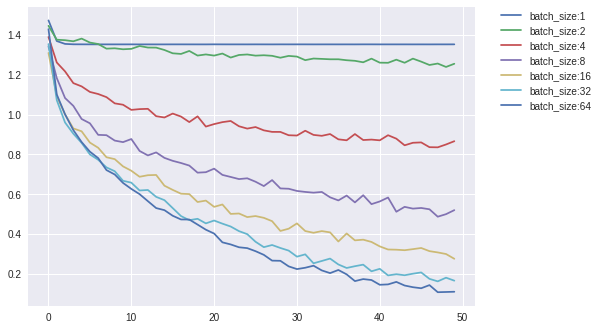

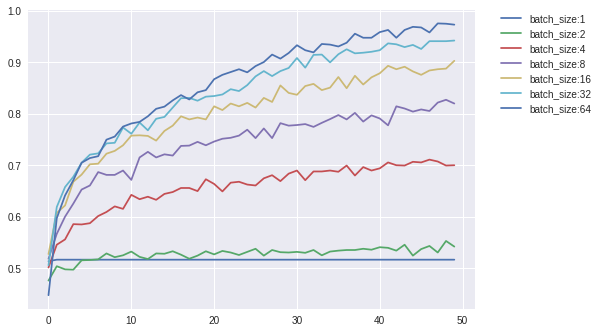

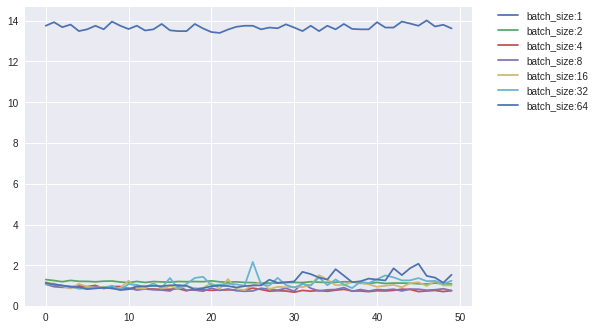

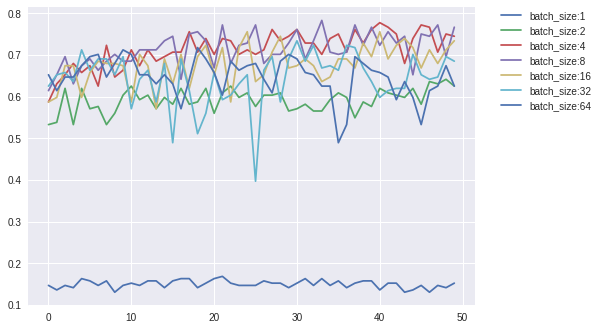

In [0]:
#@title How BN and batch size affect performance { vertical-output: true, display-mode: "both" }
from keras.layers import BatchNormalization
batch_size_list = [1, 2, 4, 8, 16, 32, 64] #@param {type:"raw"}

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', 
                               patience = 3, 
                               verbose = 1)

train_loss_list, train_acc_list = [], []
valid_loss_list, valid_acc_list = [], []

for batch_size in batch_size_list:
  print('Building a model with batch_size: %g' % (batch_size))
  
  K.clear_session()
  x_input = Input(shape = [X_train.shape[1]])

  x = Dense(128)(x_input)
  x = BatchNormalization(axis = -1)(x)
  x = Activation('relu')(x)
  

  x = Dense(256)(x)
  x = BatchNormalization(axis = -1)(x)
  x = Activation('relu')(x)
  
  x = Dense(5)(x)
  out = Activation('softmax')(x)

  model = Model(inputs=[x_input], outputs=[out])

  optim = Adam(lr = 0.001)

  model.compile(loss='categorical_crossentropy',
          optimizer=optim,
          metrics=['accuracy'])
  #model.summary()

  epochs = 50

  history = model.fit(X_train, Y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                shuffle=True,
                validation_split=0.1,
                #callbacks = [early_stopping]
                     )

  loss	= history.history.get('loss')
  acc 	= history.history.get('acc')

  val_loss = history.history.get('val_loss')
  val_acc = history.history.get('val_acc')
  
  train_loss_list.append(loss)
  valid_loss_list.append(val_loss)
  train_acc_list.append(acc)
  valid_acc_list.append(val_acc)

  
list_len = len(train_loss_list)

# training loss
for i in np.arange(list_len):
  plt.plot(np.arange(len(train_loss_list[i])), train_loss_list[i], label = 'batch_size:%g' % (batch_size_list[i]) )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# training acc
for i in np.arange(list_len):
  plt.plot(np.arange(len(train_acc_list[i])), train_acc_list[i], label = 'batch_size:%g' % (batch_size_list[i]) )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# valid loss
for i in np.arange(list_len):
  plt.plot(np.arange(len(valid_loss_list[i])), valid_loss_list[i], label = 'batch_size:%g' % (batch_size_list[i]))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


# valid acc
for i in np.arange(list_len):
  plt.plot(np.arange(len(valid_acc_list[i])), valid_acc_list[i], label = 'batch_size:%g' % (batch_size_list[i]))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

